In [188]:
### one stock historical VaR

# ! pip install pandas-datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime


In [189]:
ibm = pdr.get_data_yahoo(symbols='IBM', start=datetime(2018, 3, 26), end=datetime(2019, 3, 25))
ibm_adj = ibm['Adj Close']
ibm['returns'] = ibm['Adj Close'].pct_change()


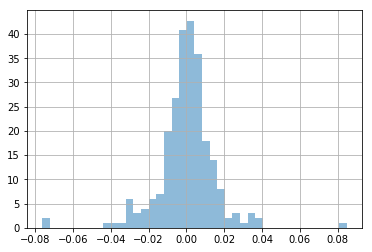

In [190]:
from scipy.stats import norm 
import matplotlib.mlab as mlab
mean_ibm = np.mean(ibm['returns'])
std_ibm = np.std(ibm['returns'])
ibm['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)



In [191]:
# ! pip install tabulate
from tabulate import tabulate
VaR_90 = norm.ppf(1-0.9, mean_ibm, std_ibm)
VaR_95 = norm.ppf(1-0.95, mean_ibm, std_ibm)
VaR_99 = norm.ppf(1-0.99, mean_ibm, std_ibm)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0196344
95%                      -0.0251757
99%                      -0.0355703


In [192]:
## one stock Parametric VaR 
ibm.sort_values('returns',inplace = True, ascending = True)
VaR_90 = ibm['returns'].quantile(0.1)
VaR_95 = ibm['returns'].quantile(0.05)
VaR_99 = ibm['returns'].quantile(0.01)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0141695
95%                      -0.0257915
99%                      -0.0391194


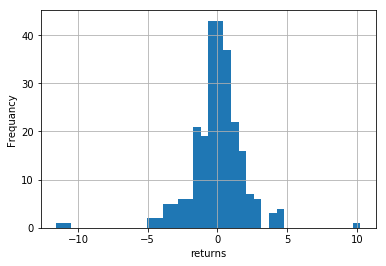

Confidence Level      Value at Risk
------------------  ---------------
90%                        -2.60413
95%                        -3.33409
99%                        -4.70339


In [193]:
## one stock historical loss and profit VaR
a = ibm_adj 
b = a[1:]
c = [0]*len(b)
for i in range(len(b)):
    c[i] = b[i] - a[i]

mean_ibm_pl = np.mean(c)
std_ibm_pl = np.std(c)   
plt.hist(c,bins = 40)
plt.xlabel('returns')
plt.ylabel('Frequancy')
plt.grid(True)
plt.show()

VaR_90 = norm.ppf(1-0.9, mean_ibm_pl, std_ibm_pl)
VaR_95 = norm.ppf(1-0.95, mean_ibm_pl, std_ibm_pl)
VaR_99 = norm.ppf(1-0.99, mean_ibm_pl, std_ibm_pl)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


In [205]:
## one stock Parametric loss and profit VaR
c.sort()
VaR_90 = np.percentile(c,10)
VaR_95 = np.percentile(c,5)
VaR_99 = np.percentile(c,1)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                        -1.99661
95%                        -3.31911
99%                        -4.77711


In [219]:
###  portfolio historical VaR(ibm & aapl; equal share)
aapl = pdr.get_data_yahoo(symbols='AAPL', start=datetime(2018, 3, 26), end=datetime(2019, 3, 25))
aapl_adj = aapl['Adj Close']
aapl['total'] = aapl['Adj Close'] +ibm['Adj Close'] 
aapl['returns'] = aapl['total'].pct_change()

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0191449
95%                      -0.0246445
99%                      -0.0349609


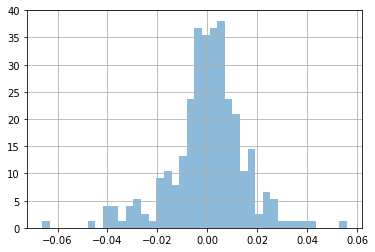

In [224]:
mean_aapl = np.mean(aapl['returns'])
std_aapl = np.std(aapl['returns'])
aapl['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)

VaR_90 = norm.ppf(1-0.9, mean_aapl, std_aapl)
VaR_95 = norm.ppf(1-0.95, mean_aapl, std_aapl)
VaR_99 = norm.ppf(1-0.99, mean_aapl, std_aapl)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

In [221]:
##  portfolio Parametric VaR 
aapl.sort_values('returns',inplace = True, ascending = True)
VaR_90 = aapl['returns'].quantile(0.1)
VaR_95 = aapl['returns'].quantile(0.05)
VaR_99 = aapl['returns'].quantile(0.01)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0179447
95%                      -0.0281137
99%                      -0.0399161


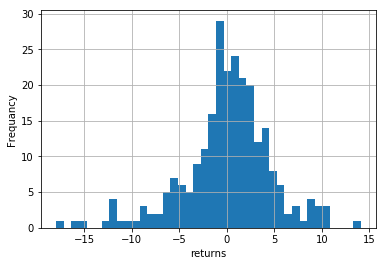

Confidence Level      Value at Risk
------------------  ---------------
90%                        -5.97486
95%                        -7.68143
99%                       -10.8827


In [242]:
## portfolio historical loss and profit VaR
a = aapl['Adj Close'] +ibm['Adj Close']
b = a[1:]
c = [0]*len(b)
for i in range(len(b)):
    c[i] = b[i] - a[i]

mean_portfolio_pl = np.mean(c)
std_portfolio_pl = np.std(c)   
plt.hist(c,bins = 40)
plt.xlabel('returns')
plt.ylabel('Frequancy')
plt.grid(True)
plt.show()

VaR_90 = norm.ppf(1-0.9, mean_portfolio_pl, std_portfolio_pl)
VaR_95 = norm.ppf(1-0.95, mean_portfolio_pl, std_portfolio_pl)
VaR_99 = norm.ppf(1-0.99, mean_portfolio_pl, std_portfolio_pl)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))



In [379]:
## portfolio historical loss and profit VaR
a = aapl['Adj Close'] +ibm['Adj Close']
b = a[1:]
c = [0]*len(b)
for i in range(len(b)):
    c[i] = b[i] - a[i]



In [380]:
## portfolio Parametric loss and profit VaR
c.sort()
VaR_90 = np.percentile(c,10)
VaR_95 = np.percentile(c,5)
VaR_99 = np.percentile(c,1)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                        -5.84112
95%                        -8.73131
99%                       -13.8877


In [381]:
### option + aapl

def d1(S,K,v,r,d,T):
    return (log(S/K)+(r - d + v**2/2)*T)/(v * sqrt(T))
    
def d2(S,K,v,r,d,T):
    return d1(S,K,v,r,d,T)-(v * sqrt(T))
    
def Price(S,K,v,r,d,T,callflag):
    if callflag == 0:
        return K*exp(-r*T)*0.5*(1+erf(-d2(S,K,v,r,d,T)/sqrt(2)))-S*exp(-d*T)*0.5*(1+erf(-d1(S,K,v,r,d,T)/sqrt(2)))
    if callflag == 1:
        return S*exp(-d*T)*0.5*(1+erf(d1(S,K,v,r,d,T)/sqrt(2)))-K*exp(-r*T)*0.5*(1+erf(d2(S,K,v,r,d,T)/sqrt(2)))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0303827
95%                      -0.0390904
99%                      -0.0554245


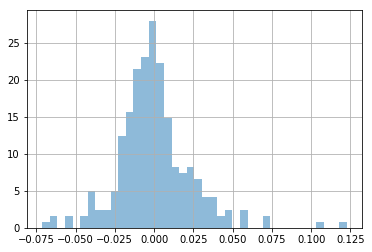

In [382]:
## historical VaR
data = pd.read_csv("/Users/guapofish/Desktop/miniHomeworkReturn.csv")
data['returns'] = data['appl+ option'].pct_change()
mean_data = np.mean(data['returns'])
std_data= np.std(data['returns'])
data['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)
VaR_90 = norm.ppf(1-0.9, mean_data, std_data)
VaR_95 = norm.ppf(1-0.95, mean_data, std_data)
VaR_99 = norm.ppf(1-0.99, mean_data, std_data)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

In [383]:
## parametic VaR
data.sort_values('returns',inplace = True, ascending = True)
VaR_90 = aapl['returns'].quantile(0.1)
VaR_95 = aapl['returns'].quantile(0.05)
VaR_99 = aapl['returns'].quantile(0.01)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0179447
95%                      -0.0281137
99%                      -0.0399161


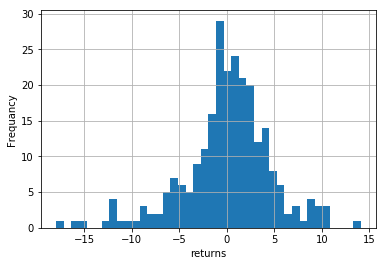

Confidence Level      Value at Risk
------------------  ---------------
90%                        -5.97486
95%                        -7.68143
99%                       -10.8827


In [385]:
## historical profit and loss
aapl['appl+ option'] = data['appl+ option'] 
a = aapl['appl+ option'] 
b = a[1:]
c = [0]*len(b)

for i in range(len(c)):
    c[i] = b[i] - a[i]

mean_data_pl = np.mean(c)
std_data_pl = np.std(c)   
plt.hist(c,bins = 40)
plt.xlabel('returns')
plt.ylabel('Frequancy')
plt.grid(True)
plt.show()

VaR_90 = norm.ppf(1-0.9, mean_data_pl, std_data_pl)
VaR_95 = norm.ppf(1-0.95, mean_data_pl, std_data_pl)
VaR_99 = norm.ppf(1-0.99, mean_data_pl, std_data_pl)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))




In [386]:
## aapl+option Parametric loss and profit VaR
c.sort()
VaR_90 = np.percentile(c,10)
VaR_95 = np.percentile(c,5)
VaR_99 = np.percentile(c,1)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                        -5.84112
95%                        -8.73131
99%                       -13.8877
